# Principal Component Analysis (PCA)

## Introducción

### Objetivos

### ¿Qué es PCA y por qué es útil?


## Fundamentos Teóricos de PCA

PCA (Principal Component Analysis) es una técnica utilizada para **reducir la dimensionalidad** de un conjunto de datos mientras se conserva la mayor cantidad posible de su varianza. Esta técnica se basa en una transformación lineal de los datos hacia un nuevo sistema de coordenadas definido por los eigenvectores de la matriz de covarianza. A continuación, se presentan las dos derivaciones principales del método.

---

### Derivación de PCA

#### Proyección para máxima varianza

#### Aproximación con error mínimo

### Relación entre ambos enfoques
---

### Resumen del Algoritmo PCA

Dado un conjunto de datos $\boldsymbol{X} \in \mathbb{R}^{N \times D}$ y un número de componentes principales $M$, el algoritmo PCA puede resumirse en los siguientes pasos:

1. **Estandarizar los datos** (restar media y escalar por desviación estándar):

   $$
   \boldsymbol{X}_{\text{std}} = \left(\boldsymbol{X} - \bar{\boldsymbol{X}}\right) / \boldsymbol{\sigma}
   $$
   
   donde  $\boldsymbol{\sigma} \in \mathbb{R}^D$ es el vector de desviaciones estándar.

2. **Calcular la matriz de covarianza**:

   $$
   \boldsymbol{S} = \frac{1}{N} \boldsymbol{X}_{\text{std}}^\top \boldsymbol{X}_{\text{std}}
   $$

3. **Calcular los eigenvalores y eigenvectores de $\boldsymbol{S}$**.

4. **Ordenar los eigenvectores según los eigenvalores de mayor a menor**.

5. **Seleccionar los primeros** $M$ **eigenvectores** para formar la matriz de componentes principales $\boldsymbol{B}$.

6. **Proyectar los datos**:

   $$
   \boldsymbol{Z} = \boldsymbol{X}_{\text{std}} \boldsymbol{B}
   $$

7. *(Opcional)* **Reconstrucción** desde el subespacio:

   $$
   \hat{\boldsymbol{X}} = \boldsymbol{Z} \boldsymbol{B}^\top \cdot \boldsymbol{\sigma} + \bar{\boldsymbol{X}}
   $$

## Implementación de PCA

## Carga y preparación de datos

En esta sección se utilizará el conjunto de datos MNIST 784, que contiene imagenes de dígitos escritos a mano con resolución de 28x28 pixeles, lo que da lugar a 784 características por muestra.
La carga de los datos se realizará a través de la función `fetch_openml` del módulo `sklearn.datasets`, que permite descargar el conjunto directamente desde OpenML de manera sencilla y reproducible. 

In [5]:
from sklearn.datasets import fetch_openml

In [7]:
images, labels = fetch_openml("mnist_784",  # 28x28 mnist dataset 
                              version=1,
                              return_X_y=True,
                              as_frame=False)  # Data is returned as a np array

In [8]:
print('Total of images: ', images.shape[0])
print('Size of images (28 x 28): ', images.shape[1])

Total of images:  70000
Size of images (28 x 28):  784


In [9]:
print("D = ", images.shape[1])
print("M = ", images.shape[0])

D =  784
M =  70000


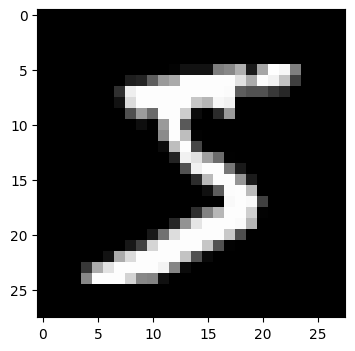

In [10]:
plt.figure(figsize=(4,4))
plt.imshow(images[0].reshape(28,28), cmap='gray')

### 

###  Data preprocessing

1. Normalizar los datos (cada pixel debe estar entre 0 y 1). 
2. Substraer de cada imagen $\mu$. 
3. Escalar cada imagen por $1/\sigma$. 

In [11]:
def normalize_images(X: np.ndarray, NUM_DATAPOINTS: int): 
    """
    Normalize the set of images. 
    """ 
    X_n = (X.reshape(-1, 28 * 28)[:NUM_DATAPOINTS]) / 255.0
    return X_n

In [14]:
def estandarize_data(X: np.ndarray):
    """
    Estandarize the given dataset X. 
    """ 
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    std_filled = std.copy()
    std_filled[std == 0] = 1.0
    X_b = ((X - mu) / std_filled)
    return X_b, mu, std

In [ ]:
nimages = normalize_images(images, 1000)  # We use a total of 1000 images from the original dataset

In [15]:
X_b, mu, std = estandarize_data(nimages)

## Evaluación Experimental

In [17]:
import timeit

In [18]:
def time(f, repeat=10): 
    """Function go get the running time of a external function. """
    times = []
    for _ in range(repeat): 
        start = timeit.default_timer()
        f()
        stop = timeit.default_timer()
        times.append(stop - start)
    return np.mean(times), np.std(times)

### Comparación de rendimiento

### Visualización de resultados

## Conclusiones

### Referencias